In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

In [11]:
path = 'C:/Users/minsu/Desktop/Work/current/mlpractical/semester2/TwitterSA/code/reports/*.csv'
def read_reports(path, layers, max_length):
    dfs = []
    kernel_sizes = []
    accuracy_values = []
    for filename in glob.glob(path):
        if layers in filename and max_length in filename:
            dfs.append(pd.read_csv(filename))
            ksize = int(filename[-22:-20])
            kernel_sizes.append(ksize)
    for k in range(len(kernel_sizes)):
        if kernel_sizes[k] < 0:
            kernel_sizes[k] = -kernel_sizes[k]
        accuracy_values.append(dfs[k].loc[3][1])
    print(len(kernel_sizes), len(accuracy_values))
    sorted_data = sorted(zip(kernel_sizes, accuracy_values), key=lambda x: x[0])
    kernel_sizes, accuracy_values = zip(*sorted_data)
    print(kernel_sizes, accuracy_values)
    return kernel_sizes, accuracy_values

In [28]:
layers0 = '4cnn'
max_length0 = '30mlength'

kernel_sizes0, accuracy_values0 = read_reports(path, layers0, max_length0)

5 5
(3, 4, 5, 6, 7) (0.94424105885666, 0.9465878156387872, 0.9473387778090678, 0.947432648080353, 0.9459307237397916)


In [29]:
layers1 = '3cnn'

kernel_sizes1, accuracy_values1 = read_reports(path, layers1, max_length0)

8 8
(3, 4, 5, 6, 7, 8, 9, 10) (0.9471979724021402, 0.9472449075377828, 0.9433962264150944, 0.9456491129259365, 0.9461184642823618, 0.9478081291654932, 0.9449920210269408, 0.9448981507556556)


In [30]:
layers2 = '2cnn'

kernel_sizes2, accuracy_values2 = read_reports(path, layers2, max_length0)

13 13
(3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15) (0.9494977940486248, 0.949075377827842, 0.9477142588942082, 0.948559091335774, 0.9466347507744296, 0.945461372383366, 0.9460245940110767, 0.9452266967051536, 0.9450858912982258, 0.9455083075190088, 0.9435839669576646, 0.9441002534497324, 0.939547545292406)


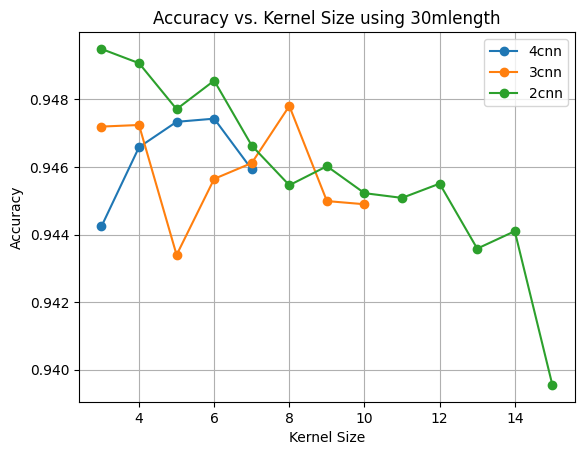

In [31]:
plt.plot(kernel_sizes0, accuracy_values0, '-o', label=layers0)
plt.plot(kernel_sizes1, accuracy_values1, '-o', label=layers1)
plt.plot(kernel_sizes2, accuracy_values2, '-o', label=layers2)
plt.xlabel('Kernel Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Kernel Size using {0}'.format(max_length0))
plt.grid(True)
plt.legend()
plt.savefig('./reports/figures/Accuracy vs. Kernel Size using {0}.png'.format(max_length0))
plt.show()